# Linear & Logistic Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# %matplotlib inline

### Linear Regression

#### Prepare data

In [22]:
X_np, Y_np = datasets.make_regression(n_samples=100, n_features=1, noise=10, random_state=1)
# (X_np, Y_np)[:][:10]

In [30]:
X = torch.from_numpy(X_np.astype(np.float32))
Y = torch.from_numpy(Y_np.astype(np.float32))

print(f'X shape:{X.shape}')
print(f'Y shape:{Y.shape}')      

X shape:torch.Size([100, 1])
Y shape:torch.Size([100])


In [31]:
Y = Y.view(Y.shape[0], 1) # we have to adjust the shape of Y to comply with X
print(f'X shape:{X.shape}')
print(f'Y shape:{Y.shape}')   

X shape:torch.Size([100, 1])
Y shape:torch.Size([100, 1])


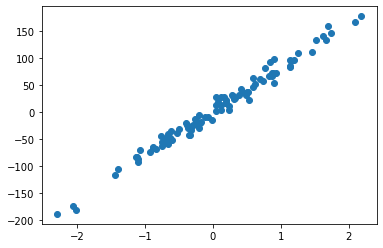

In [32]:
plt.scatter(X, Y)

In [33]:
nb_samples, nb_features = X.shape
nb_samples, nb_features

(100, 1)

In [34]:
nb_output = Y.shape[1]
nb_output

1

#### Training

In [43]:
learning_rate = 0.05

model = nn.Linear(nb_features, nb_output)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [45]:
max_epochs = 100
for epoch in range(max_epochs):
    Y_pred = model(X)
    loss = loss_function(Y, Y_pred)
    
    loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch % 5 == 0 or epoch + 1 == max_epochs):
        w = model.weight.item()
        b = model.bias.item()
        print(f'epoch={epoch}, loss={loss:.5f}, W={w:.5f}, b={b:.5f}')

epoch=0, loss=4624.36963, W=11.77975, b=0.91656
epoch=5, loss=2070.84424, W=35.26377, b=2.82590
epoch=10, loss=957.70514, W=50.81665, b=3.46449
epoch=15, loss=469.53204, W=61.12999, b=3.51765
epoch=20, loss=254.40865, W=67.97663, b=3.33414
epoch=25, loss=159.24872, W=72.52642, b=3.08306
epoch=30, loss=117.02891, W=75.55257, b=2.83991
epoch=35, loss=98.25336, W=77.56691, b=2.63321
epoch=40, loss=89.88861, W=78.90868, b=2.46913
epoch=45, loss=86.15684, W=79.80299, b=2.34423
epoch=50, loss=84.49013, W=80.39939, b=2.25181
epoch=55, loss=83.74512, W=80.79731, b=2.18478
epoch=60, loss=83.41190, W=81.06291, b=2.13689
epoch=65, loss=83.26279, W=81.24026, b=2.10307
epoch=70, loss=83.19604, W=81.35873, b=2.07939
epoch=75, loss=83.16615, W=81.43787, b=2.06293
epoch=80, loss=83.15276, W=81.49077, b=2.05156
epoch=85, loss=83.14676, W=81.52613, b=2.04374
epoch=90, loss=83.14407, W=81.54977, b=2.03838
epoch=95, loss=83.14288, W=81.56557, b=2.03472
epoch=99, loss=83.14240, W=81.57435, b=2.03266


#### Plot results

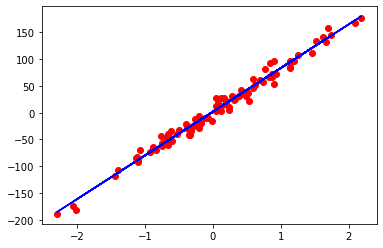

In [51]:
predicted_results = model(X).detach().numpy() # detaches from the computation graph

plt.plot(X_np, Y_np, 'ro')
plt.plot(X_np, predicted_results, 'b')

### Logistic Regression

In [ ]:
#TBD